# Logistic regression scratchpad

In this scratchpad we perform a series of experiments.  First to determine if we can use linear regression, followed by a nonlinear transformation, to deal with the problem of classification.  Second testing out what is called the logistic regression algorithm - which is just gradient descent applied to a particular cost function we derive in class.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Directly applying linear regression to a binary problem

We have a dataset that looks like the following: a simple two class dataset.  From a regression point of view the only difference here - visually speaking - is that the output is **strictly binary**.  We found that this was true in level 1 of the course as well, when we plot our toy classification datasets.

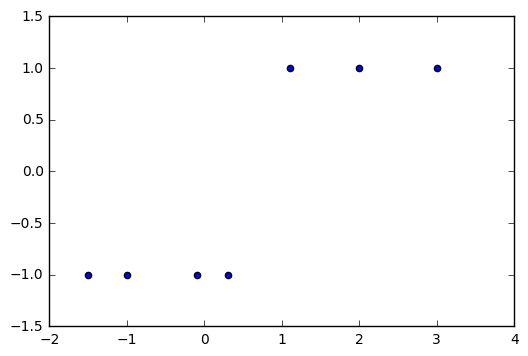

In [4]:
# load a dataset
data = np.loadtxt('datasets/1d_logistic_data_v1.csv')
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

# simple scatter plot of this data
plt.scatter(x,y)
plt.show()

What happens if we use linear regression to fit this dataset?  Intuitively this might not sound like a good idea - this doesn't look like a line will fit it well.  But lets try it out real quick.

In [5]:
# least squares cost function gradient
def compute_gradient(x,y,w):
    P = len(y)
    grad = 0
    for p in range(P):
        x_p = np.array([1,x[p]])
        x_p.shape = (len(x_p),1)
        y_p = y[p]
        temp = np.dot(x_p*x_p.T,w) - x_p*y_p
        grad+=2*temp
    return grad

In [6]:
# least squares cost function evaluation function
def compute_costval(x,y,w):
    P = len(y)
    costval = 0
    for p in range(P):
        x_p = np.array([1,x[p]])
        x_p.shape = (len(x_p),1)
        y_p = y[p]
        temp = (np.dot(x_p.T,w) - y_p)**2
        costval+=temp
    return costval[0]

In [7]:
# linear regression gradient descent 
def grad_descent(x,y,alpha,K):
    # initial point
    w = np.random.randn(np.shape(x)[1]+1,1)
    
    # container for weight history
    whist = []
    for j in range(K):
        # compute current cost value an store
        g = compute_costval(x,y,w)
        whist.append(w)

        # compute grad
        grad = compute_gradient(x,y,w)
        
        # take descent step
        w = w - alpha*grad
    
    return whist

With our gradient and descent loop defined we can run them.

In [8]:
# fit linear regression to dataset via gradient descent
alpha = 10**-2
K = 1000
whist = grad_descent(x,y,alpha,K)

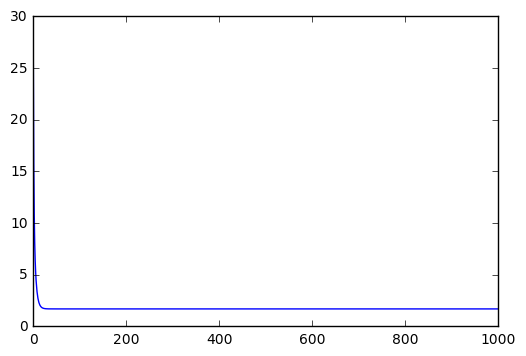

In [32]:
# plot cost history
ghist = []
for k in range(K):
    w_k = whist[k]
    g_k = compute_costval(x,y,w_k)
    ghist.append(g_k)
plt.plot(ghist)
plt.show()

Now lets fit the best fit line to the data.

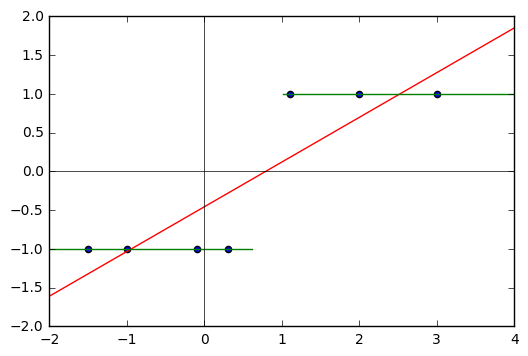

In [33]:
# get best weight
k_star = np.argmin(ghist)
w = whist[k_star]

# generate input for best fit line
xgap = 0.1*(max(x) - min(x))
s = np.linspace(min(x) - xgap, max(x) + xgap)
s = np.linspace(-10,10)

# create best fit line
t = w[0] + s*w[1]

# take sign(.) of best fit line
t2 = np.sign(t)

# plot data
plt.scatter(x,y)

# plot best fit line
plt.plot(s,t,color = 'r')

### plot sign(.) of best fit line - split into top step and bottom to plot so matplotlib doesn't connect the two steps
ind = np.argwhere(t2 == -1)
ind = [a[0] for a in ind]
t_temp = t2.copy()
t_temp[ind] = np.nan
plt.plot(s,t_temp,color = 'g')

ind = np.argwhere(t2 == 1)
ind = [a[0] for a in ind]
t_temp = t2.copy()
t_temp[ind] = np.nan
plt.plot(s,t_temp,color = 'g')

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
plt.plot(s,np.zeros((len(s),1)),color = 'k',linewidth = 0.5)
plt.plot(np.zeros((len(s),1)),s,color = 'k',linewidth = 0.5)

plt.xlim([-2,4])
plt.ylim([-2,2])
plt.show()

Shown in red is the best fit line.  Clearly not a great choice.  

But shown in red is a simple nonlinear transformation of that same line.  If the line is defined as 

$$y = w_0 + w_1x$$

then the function in red is just the mathematical sign of this function, i.e.,

$$y = \text{sign}(w_0 + w_1x)$$

In other words if we simply shove our best fit line through a sign function it seems - on this dataset anyway - that our resulting nonlinear fit isn't too bad!  We fit everything perfectly with the green **step function** - so called because it looks like a step!

## Step function separation

Looking back at that dataset, clearly some step function will fit it perfectly.  So long as we can tune the weights correctly!

But did what we just do - fitting the dataset via linear regression and then transforming afterwards - work more generally?  Well - lets try it on another dataset to check.

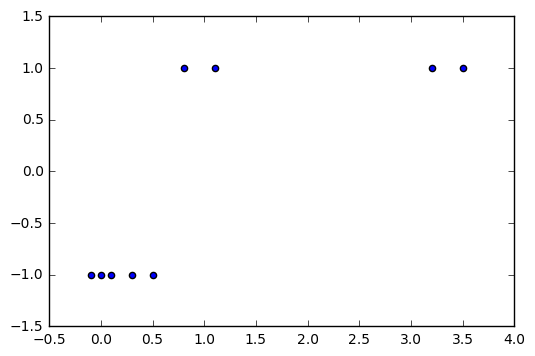

In [9]:
# load a dataset
data = np.loadtxt('datasets/1d_logistic_data_v2.csv')
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

# simple scatter plot of this data
plt.scatter(x,y)
plt.show()

This one looks a little different - but so what?

In [12]:
# fit linear regression to dataset via gradient descent
alpha = 10**-2
K = 1000
whist = grad_descent(x,y,alpha,K)

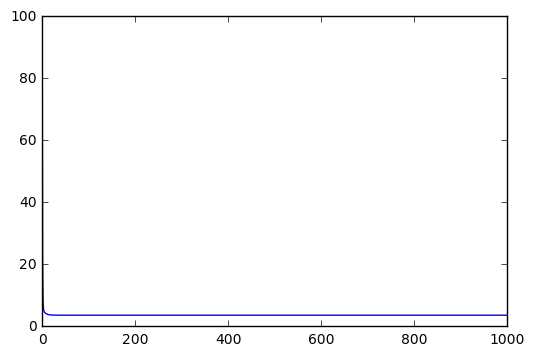

In [13]:
# plot cost history
ghist = []
for k in range(K):
    w_k = whist[k]
    g_k = compute_costval(x,y,w_k)
    ghist.append(g_k)
plt.plot(ghist)
plt.show()

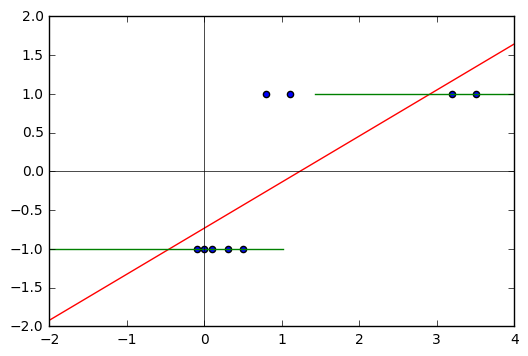

In [14]:
# get best weight
k_star = np.argmin(ghist)
w = whist[k_star]

# generate input for best fit line
xgap = 0.1*(max(x) - min(x))
s = np.linspace(min(x) - xgap, max(x) + xgap)
s = np.linspace(-10,10)

# create best fit line
t = w[0] + s*w[1]

# take sign(.) of best fit line
t2 = np.sign(t)

# plot data
plt.scatter(x,y)

# plot best fit line
plt.plot(s,t,color = 'r')

### plot sign(.) of best fit line - split into top step and bottom to plot so matplotlib doesn't connect the two steps
ind = np.argwhere(t2 == -1)
ind = [a[0] for a in ind]
t_temp = t2.copy()
t_temp[ind] = np.nan
plt.plot(s,t_temp,color = 'g')

ind = np.argwhere(t2 == 1)
ind = [a[0] for a in ind]
t_temp = t2.copy()
t_temp[ind] = np.nan
plt.plot(s,t_temp,color = 'g')

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
plt.plot(s,np.zeros((len(s),1)),color = 'k',linewidth = 0.5)
plt.plot(np.zeros((len(s),1)),s,color = 'k',linewidth = 0.5)

plt.xlim([-2,4])
plt.ylim([-2,2])
plt.show()

Ruh roh.  Thats no good.  This dataset is clearly fit-able by some sort of step - but we don't capture it using this method.  What else can we do?  

Here's what we can do - instead of tuning the parameters first, then shoving the corresponding line through the step function, we can try to tune the parameters *inside* the nonlinearity!

What happens if we do this? 

# 2.  Plotting misclassification count surface

<IPython.core.display.Javascript object>


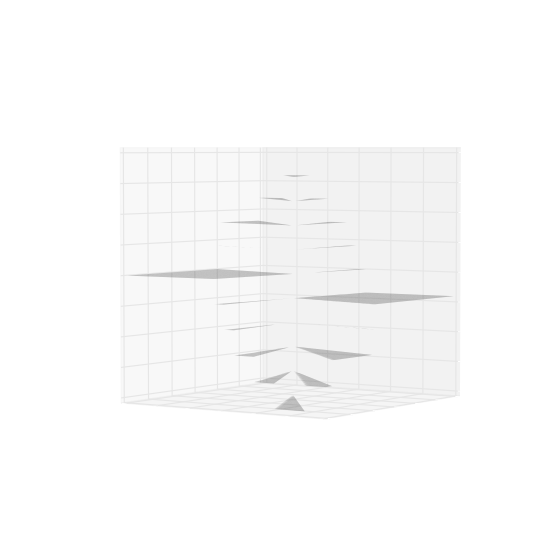

In [15]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# define figure
fig = plt.figure(num=None, figsize=(7,7), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(111,projection='3d')

# define coordinate system
r = np.linspace(-15,15,600)    
s,t = np.meshgrid(r,r)
s.shape = (np.prod(np.shape(s)),1)
t.shape = (np.prod(np.shape(t)),1)

# define cost surface
cost = 0
for p in range(len(y)):
    x_p = x[p]
    y_p = y[p]
    cost += (np.sign(y_p*(s + t*x_p)) - 1)**2

# loop over levels and print
s.shape = (len(r),len(r))
t.shape = (len(r),len(r))

levels = np.unique(cost)
for u in levels:
    # make copy of cost and nan out all non level entries
    z = cost.copy()
    ind = np.argwhere(z != u)
    ind = [v[0] for v in ind]
    z[ind] = np.nan

    # plot the current level
    z.shape = (len(r),len(r)) 
    ax1.plot_surface(s,t,z,alpha = 0.3,color = '#696969',zorder = 0,shade = True,linewidth=0)

# turn off tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])

# set viewing angle
ax1.view_init(5,126)

# Get rid of the spines on the 3d plot
levels = [int(s) for s in levels]
ax1.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax1.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax1.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# turn off tick marks
ax1.xaxis.set_tick_params(size=0,color = 'w')
ax1.yaxis.set_tick_params(size=0,color = 'w')
ax1.zaxis.set_tick_params(size=0,color = 'w')

# 3.  tanh least squares cost function

<IPython.core.display.Javascript object>


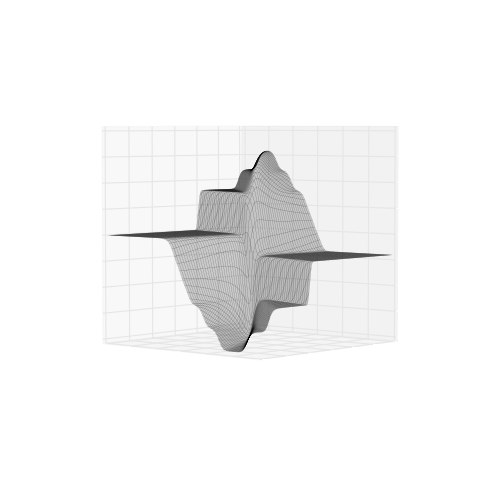

In [17]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# define figure
fig = plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(111,projection='3d')

# define coordinate system
r = np.linspace(-15,15,600)    
s,t = np.meshgrid(r,r)
s.shape = (np.prod(np.shape(s)),1)
t.shape = (np.prod(np.shape(t)),1)

# define cost surface
cost = 0
for p in range(len(y)):
    x_p = x[p]
    y_p = y[p]
    cost += (np.tanh(y_p*(s + t*x_p)) - 1)**2

# loop over levels and print
s.shape = (len(r),len(r))
t.shape = (len(r),len(r))
cost.shape = (len(r),len(r))
ax1.plot_surface(s,t,cost,alpha = 0.3,color = '#696969',zorder = 0,linewidth=0.2)

# turn off tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])

# set viewing angle
ax1.view_init(5,126)

# Get rid of the spines on the 3d plot
levels = [int(s) for s in levels]
ax1.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax1.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax1.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# turn off tick marks
ax1.xaxis.set_tick_params(size=0,color = 'w')
ax1.yaxis.set_tick_params(size=0,color = 'w')
ax1.zaxis.set_tick_params(size=0,color = 'w')

# 4.  Final attempt at a reasonable cost function

<IPython.core.display.Javascript object>


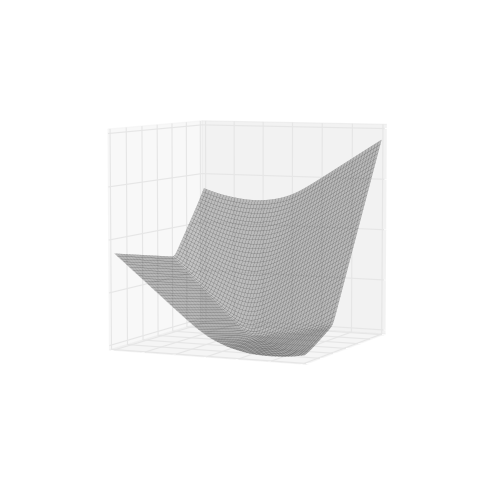

In [18]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# define figure
fig = plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(111,projection='3d')

# define coordinate system
r = np.linspace(-15,15,600)    
s,t = np.meshgrid(r,r)
s.shape = (np.prod(np.shape(s)),1)
t.shape = (np.prod(np.shape(t)),1)
h = np.concatenate((s,t),axis = 1)

# define cost surface
cost = 0
for p in range(len(y)):
    x_p = x[p]
    y_p = y[p]
    cost += np.log(1 + np.exp(-y_p*(s + t*x_p)))

# loop over levels and print
s.shape = (len(r),len(r))
t.shape = (len(r),len(r))
cost.shape = (len(r),len(r))
ax1.plot_surface(s,t,cost,alpha = 0.3,color = '#696969',zorder = 0,linewidth=0.2)

# turn off tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])

# set viewing angle
ax1.view_init(5,126)

# Get rid of the spines on the 3d plot
ax1.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax1.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax1.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# turn off tick marks
ax1.xaxis.set_tick_params(size=0,color = 'w')
ax1.yaxis.set_tick_params(size=0,color = 'w')
ax1.zaxis.set_tick_params(size=0,color = 'w')

# 4.  logistc regression gradient descent

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def compute_cost_val(x,y,w):
    P = len(y)
    cost = 0
    for p in range(P):
        x_p = list(x[p])
        x_p.insert(0,1)
        x_p = np.array(x_p)
        x_p.shape = (len(x_p),1)
        
        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p*np.dot(x_p.T,w)))
    return cost[0]

In [57]:
# function for computing the logistic regression cost gradient
def compute_gradient(x,y,w):
    # produce gradient for each class weights
    P = len(y)
    grad = 0
    for p in range(P):
        x_p = list(x[p])
        x_p.insert(0,1)
        x_p = np.array(x_p)
        x_p.shape = (len(x_p),1)
        
        y_p = y[p]
        grad+= -1/(1 + np.exp(y_p*np.dot(x_p.T,w)))*y_p*x_p
    
    grad.shape = (len(grad),1)
    return grad

In [58]:
# gradient descent function for softmax cost/logistic regression 
def gradient_descent(x,y,w,alpha,K):
    # container for weight history
    whist = []
    
    # grad descent loop
    for j in range(K):
        # update container
        whist.append(w)
        
        # compute gradient
        grad = compute_gradient(x,y,w)
        w = w - alpha*grad;

        # update iteration count
    return whist

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# load a dataset
data = np.loadtxt('datasets/1d_logistic_data_v2.csv')
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# set inputs to grad descent
alpha = 10**-1
K = 1000
w = np.random.randn(np.shape(x)[1] + 1,1);        # random initial point

# run gradient descent
whist = gradient_descent(x,y,w,alpha,K)

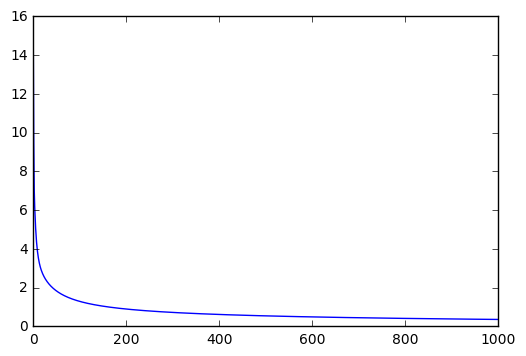

In [68]:
%matplotlib inline
ghist = []
for k in range(K):
    w_k = whist[k]
    g_k = logistic_costval(x,y,w_k)
    ghist.append(g_k)
plt.plot(ghist)
plt.show()

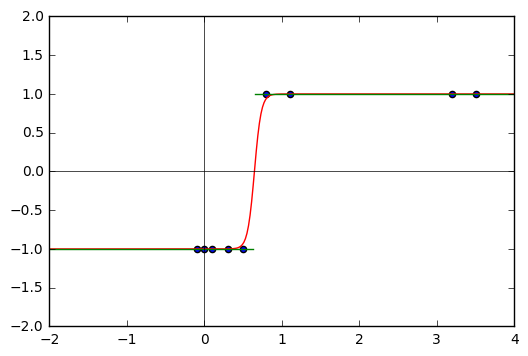

In [69]:
# get best weight
k_star = np.argmin(ghist)
w = whist[k_star]

# generate input for best fit line
xgap = 0.1*(max(x) - min(x))
s = np.linspace(-10,10,1000)

# create best fit sigmoid
t = np.tanh(w[0] + s*w[1])

# take sign(.) of best fit line
t2 = np.sign(t)

# plot data
plt.scatter(x,y)

# plot best fit line
plt.plot(s,t,color = 'r')

### plot sign(.) of best fit line - split into top step and bottom to plot so matplotlib doesn't connect the two steps
ind = np.argwhere(t2 == -1)
ind = [a[0] for a in ind]
t_temp = t2.copy()
t_temp[ind] = np.nan
plt.plot(s,t_temp,color = 'g')

ind = np.argwhere(t2 == 1)
ind = [a[0] for a in ind]
t_temp = t2.copy()
t_temp[ind] = np.nan
plt.plot(s,t_temp,color = 'g')

# clean up plot, plot x and y axes
s = np.linspace(-10,10)
plt.plot(s,np.zeros((len(s),1)),color = 'k',linewidth = 0.5)
plt.plot(np.zeros((len(s),1)),s,color = 'k',linewidth = 0.5)

plt.xlim([-2,4])
plt.ylim([-2,2])
plt.show()